# Data Wrangling

As the data to build the model is from 3rd party resource, exploration and cleaning is essential step. 
Meanwhile, the primary data is question sentance which a typical NLP data cleaning step should be followed to guarantee the data is generic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

### Preliminary EDA

In [3]:
print('Training data set: ' + str(len(train_data)))
print('Test data set: ' + str(len(test_data)))


Training data set: 1306122
Test data set: 375806


The below indicate there is no null cell in all columns. Hence, don't need to fill or remove the record at this moment 

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
qid              375806 non-null object
question_text    375806 non-null object
dtypes: object(2)
memory usage: 5.7+ MB


In [6]:
print (train_data.question_text.describe())
print('\n')
print (test_data.question_text.describe())

count                                       1306122
unique                                      1306122
top       Why did Jedha has so many Kyber Crystals?
freq                                              1
Name: question_text, dtype: object


count                                                375806
unique                                               375806
top       Where and when will the official statement be ...
freq                                                      1
Name: question_text, dtype: object


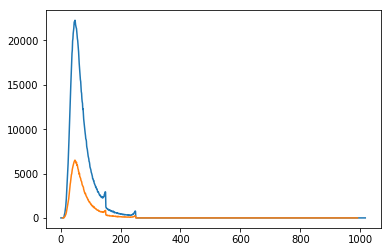

In [7]:
train_data['length'] = train_data['question_text'].str.len()
test_data['length'] = test_data['question_text'].str.len()

train_data['length'].value_counts().sort_index().plot(kind='line')
test_data['length'].value_counts().sort_index().plot(kind='line')
plt.show()

Below shows the ratio on target value: majority of questions are normal/valid question

0    1225312
1      80810
Name: target, dtype: int64


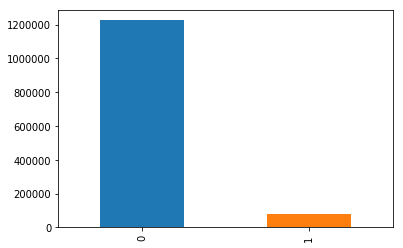

In [8]:
print(train_data['target'].value_counts())
train_data['target'].value_counts().plot(kind='bar')

Below shows the question text contains white space, special symbol & foreign characters. 
As the nlp has language specific settings and functions, the foreign characters & extra white space should be removed 
As for punchaction, some AI/ML models take the punchaction into account for semantic parsing. Some models, such as bag of words, does not using punchaction due to the natural of the algorithm is based on word frequency.    

In [9]:
sorted = train_data.sort_values('question_text')

In [10]:
sorted['question_text'].head(10)

840731          I want to blow things up with TNT now what?
613283     !TRIGGER WARNING! Am I a homophobe if I refuse...
420816                                                     "
1102919    " I post a download link of a website in my we...
213438     " I visited the theater" or "I enjoyed the the...
496717     " I've been to the doctor many times now to cu...
646127     " Is there anybody who had drastic good / bad ...
4692       " So far She has published three chapters of h...
998382     " What does the scientific mean when you dream...
387244     " if 25 men working 6 hrs a day, can do a work...
Name: question_text, dtype: object

In [11]:
sorted['question_text'].tail(10)

113435     ⁠⁠Is it bad to lay your motorcycle on its side...
146277                       −6.175 is an irrational number?
859955     ♣ Why does Winston finally give in to the ideo...
1185049    ⦁ What are the methods used to suppress or red...
415446     译文 who well be enter the next member of the st...
231111                                   한국 고등학교는 몇시간 수업하니까?
814877               what is the Complex compound sentence?
916459     ﻿What are the best porn pictures serving websi...
1261734    Ｈow do I find the negative solution of 4^x = x...
344918     ￼￼Assuming that a lightning bolt can be modell...
Name: question_text, dtype: object

### Data Wrangling for NLP 
A typical NLP pre-processed step contains the following: 
- Removing accented & foreign characters
    - The NLP is limited to one language in most of modeler, Therefore, it is helpful to remove characters tat is not english 
- Expanding Contractions
    - Frequently, contractions shows up in text taht generate variation for words. It will be helpful if we can remove them. The contractions can be removed via syntax rule.
- Expanding Abbreviation
    - Similar to tocontraction, abbreviaton generates word variation which incrase number of features int the training data. However, due to the large amount of abbreviation , possible ambiguity and has no aviable API, this will be skipped   
- Case Unification
    - This is to make all character to lower case such that the string comparsion cn recognize them
- Removing Special Characters
    - To remove non alphanumeric characters 
- Stemming
    - To remove word affixes to get to the base form of a word
- Lemmatization 
    - Also to remove word affixes to get to the base form of a word  [refrence on the difference between Stemming and Lemmatization](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python)
- Removing Stopwords
    - To remove english stop words


In [12]:
remove_accent = True
remove_non_ascii = True
remove_white_space = True
expand_contraction = True
case_unification = True
remove_special_character = True
stemming = False
lemmatization = False
remove_stopword = True

### Removing accented & foreign characters

In [13]:
%%time

def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)
def remove_white_space(text):
    return text.strip().strip('\t\n')

if remove_accent:
    train_data['question_text'] = train_data['question_text'].str.normalize('NFKD')
    test_data['question_text'] = test_data['question_text'].str.normalize('NFKD')

if remove_non_ascii:
    train_data['question_text'] = train_data['question_text'].apply(remove_non_ascii)
    test_data['question_text'] = test_data['question_text'].apply(remove_non_ascii)

if remove_white_space:
    train_data['question_text'] = train_data['question_text'].apply(remove_white_space)
    test_data['question_text'] = test_data['question_text'].apply(remove_white_space)


CPU times: user 17 s, sys: 108 ms, total: 17.1 s
Wall time: 17.2 s


### Expanding Contractions  : use [contractions](https://github.com/kootenpv/contractions), an altervative is [pycontractions](https://pypi.org/project/pycontractions/)

In [14]:
%%time

import contractions

if expand_contraction:
    train_data['question_text'] = train_data['question_text'].apply(contractions.fix)
    test_data['question_text'] = test_data['question_text'].apply(contractions.fix)


CPU times: user 2min 30s, sys: 82.4 ms, total: 2min 30s
Wall time: 2min 30s


### Case Unification

In [15]:
%%time

if case_unification:
    train_data['question_text'] = train_data['question_text'].str.lower()
    test_data['question_text'] = test_data['question_text'].str.lower()


CPU times: user 862 ms, sys: 38.7 ms, total: 901 ms
Wall time: 898 ms


### Removing Special Characters

In [16]:
%%time

import re

def remove_special_character(text):
    return re.sub('[^A-Za-z0-9\s]+', '', text)

if remove_special_character:
    train_data['question_text'] = train_data['question_text'].apply(remove_special_character)
    test_data['question_text'] = test_data['question_text'].apply(remove_special_character)


CPU times: user 5.34 s, sys: 14.7 ms, total: 5.35 s
Wall time: 5.35 s


### Stemming

In [17]:
%%time

import nltk
#nltk.download('punkt')
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

def porter_stemmer(text): #PorterStemmer
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in word_tokenize(text)])
    return text

if stemming:
    train_data['question_text'] = train_data['question_text'].apply(porter_stemmer)
    test_data['question_text'] = test_data['question_text'].apply(porter_stemmer)


CPU times: user 841 ms, sys: 317 ms, total: 1.16 s
Wall time: 1.59 s


### Lemmatization

In [18]:
%%time

import nltk
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatizer(text): 
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)])
    return text

if lemmatization:
    train_data['question_text'] = train_data['question_text'].apply(lemmatizer)
    test_data['question_text'] = test_data['question_text'].apply(lemmatizer)
    


CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 17.2 µs


### Removing Stopwords

In [19]:
%%time

import nltk
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

stop_words.remove('not')
stop_words.remove('no')

def remove_stop_word(text): 
    text = ' '.join([w for w in nltk.word_tokenize(text) if w not in stop_words])
    return text

if remove_stopword:
    train_data['question_text'] = train_data['question_text'].apply(remove_stop_word)
    test_data['question_text'] = test_data['question_text'].apply(remove_stop_word)


CPU times: user 2min 40s, sys: 164 ms, total: 2min 40s
Wall time: 2min 40s


### Post EDA 

count    1.306122e+06
mean     4.495670e+01
std      2.640209e+01
min      0.000000e+00
25%      2.700000e+01
50%      3.800000e+01
75%      5.600000e+01
max      5.890000e+02
Name: length_a, dtype: float64
count    375806.000000
mean         45.022418
std          26.367973
min           0.000000
25%          27.000000
50%          38.000000
75%          56.000000
max         478.000000
Name: length_a, dtype: float64


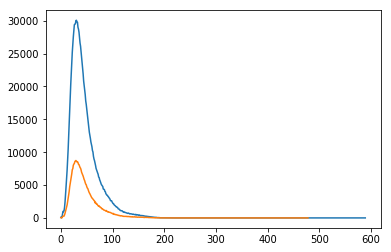

In [20]:
train_data['length_a'] = train_data['question_text'].str.len()
test_data['length_a'] = test_data['question_text'].str.len()

train_data['length_a'].value_counts().sort_index().plot(kind='line')
test_data['length_a'].value_counts().sort_index().plot(kind='line')

print(train_data['length_a'].describe())
print(test_data['length_a'].describe())

count    1.306122e+06
mean     6.525410e+00
std      3.737980e+00
min      0.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      8.000000e+00
max      7.700000e+01
Name: word_count, dtype: float64
count    375806.000000
mean          6.532488
std           3.730617
min           0.000000
25%           4.000000
50%           6.000000
75%           8.000000
max          45.000000
Name: word_count, dtype: float64


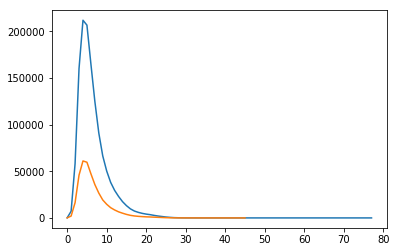

In [21]:
train_data['word_count'] = train_data['question_text'].apply(lambda x: len(str(x).split()) )
test_data['word_count'] = test_data['question_text'].apply(lambda x: len(str(x).split()) )

train_data['word_count'].value_counts().sort_index().plot(kind='line')
test_data['word_count'].value_counts().sort_index().plot(kind='line')
print(train_data['word_count'].describe())
print(test_data['word_count'].describe())

4    211692
5    206455
6    165059
3    159967
7    124914
8     90987
9     66429
2     58075
1      7148
0        97
Name: word_count, dtype: int64
4    61006
5    59644
6    47349
3    45825
7    35776
8    26598
9    19244
2    16323
1     1995
0       36
Name: word_count, dtype: int64


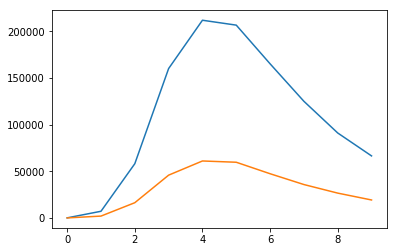

In [22]:
train_data.loc[(train_data.word_count < 10),'word_count'].value_counts().sort_index().plot(kind='line')
test_data.loc[(test_data.word_count < 10),'word_count'].value_counts().sort_index().plot(kind='line')
print(train_data.loc[(train_data.word_count < 10),'word_count'].value_counts())
print(test_data.loc[(test_data.word_count < 10),'word_count'].value_counts())

In [23]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

train_text = train_data['question_text']
test_text = test_data['question_text']
train_target = train_data['target']
all_text = train_text.append(test_text)

count_vectorizer = CountVectorizer()
count_vectorizer.fit(all_text)


bag_of_words = count_vectorizer.transform(all_text)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
word_check = pd.DataFrame(words_freq, columns=['word', 'count'])
sorted_word_check= word_check.sort_values('count', ascending=False)
print(sorted_word_check.head(30))
print(sorted_word_check.tail(30))

        word   count
12       not  134905
8      would   81846
67       get   80845
477     best   80244
10    people   71623
361     like   62936
112     good   49253
300      one   42853
356    india   41155
165     make   36268
120    think   33579
129     many   31454
355     much   30207
16      time   30114
146     life   28650
276  someone   28266
88       use   28026
70       way   26858
105     know   25947
637     want   24683
349     work   24075
114     take   23830
58      ever   23101
500       us   22593
111     find   22400
920    could   22087
140   become   21836
479  without   21514
151    world   21462
71      feel   20835
                           word  count
155464               bhadravati      1
155466               resurgents      1
155468                    ncrow      1
155469                     tcfe      1
155470                 fidelman      1
155472                     v156      1
155473                   384400      1
155449                  gunthel      

 ### Another baseline after data wrangling to compare with the initial baseline

In [24]:
import datetime, time, psutil, os
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
# remove records have no word after data wrangling
train_data = train_data.loc[(train_data.word_count > 0)]
test_data = test_data.loc[(test_data.word_count > 0)]
train_data= train_data.reset_index()
test_data = test_data.reset_index()

In [26]:
#  CONTROL PARAMTERS 
size = 0.1
tfTransform = True

train_data = train_data[: int(len(train_data) * size)]
test_data = test_data[:int(len(test_data) * size)]

In [27]:
train_text = train_data['question_text']
test_text = test_data['question_text']
train_target = train_data['target']
all_text = train_text.append(test_text)

In [28]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(all_text)
train_text_features_cv = count_vectorizer.transform(train_text)
test_text_features_cv = count_vectorizer.transform(test_text)

In [29]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(all_text)
train_text_features_tf = tfidf_vectorizer.transform(train_text)
test_text_features_tf = tfidf_vectorizer.transform(test_text)

In [30]:
if tfTransform :
    train_text_features = train_text_features_tf
    test_text_features = test_text_features_tf
else:
    train_text_features = train_text_features_cv
    test_text_features = test_text_features_cv

print(train_text_features.shape)

(130602, 75823)


In [31]:
%%time

#BernoulliNB
kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features[train_idx,:], train_text_features[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = BernoulliNB()
    classifier.fit(x_train,y_train)
   
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]
    test_preds += 0.2*classifier.predict_proba(test_text_features)[:,1]

pred_train = (oof_preds > 0.25).astype(np.int)
accuracy = f1_score(train_target, pred_train)
print(accuracy)

0.2959231271573841
CPU times: user 1.4 s, sys: 58.8 ms, total: 1.46 s
Wall time: 424 ms


In [32]:
%%time

#LogisticRegression

kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features[train_idx,:], train_text_features[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = LogisticRegression(solver='liblinear')
    classifier.fit(x_train,y_train)
   
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]
    test_preds += 0.2*classifier.predict_proba(test_text_features)[:,1]

pred_train = (oof_preds > 0.25).astype(np.int)
accuracy = f1_score(train_target, pred_train)
print(accuracy)

0.5116466944930659
CPU times: user 8.93 s, sys: 108 ms, total: 9.04 s
Wall time: 2.32 s


In [33]:
%%time

#GradientBoostingClassifier

kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features[train_idx,:], train_text_features[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = GradientBoostingClassifier(random_state=1)
    classifier.fit(x_train,y_train)
   
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]
    test_preds += 0.2*classifier.predict_proba(test_text_features)[:,1]

pred_train = (oof_preds > 0.25).astype(np.int)
accuracy = f1_score(train_target, pred_train)
print(accuracy)

0.4261235046880052
CPU times: user 1h 17min 10s, sys: 8.86 s, total: 1h 17min 19s
Wall time: 1h 12min 29s
